# Step 1: reading the data

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
df = pd.read_csv('data/College.csv')

In [18]:
df.head()

,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70.0,78,18.1,12,7041,60
1,Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29.0,30,12.2,16,10527,56
2,Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53.0,66,12.9,30,8735,54
3,Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92.0,97,7.7,37,19016,59
4,Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76.0,72,11.9,2,10922,15


In [4]:
df = df.rename({'Unnamed: 0' : 'University'}, axis = 1)

In [17]:
df.isna().sum()

University     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [16]:
df.dtypes

University      object
Private          int64
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD            float64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [9]:
df['PhD'] = pd.to_numeric(df['PhD'],errors = 'coerce')

In [11]:
df = df.dropna()

In [15]:
df['Private'] = df['Private'].replace({'Yes' : 1, 'No' : 0})

/tmp/ipykernel_11808/3206688437.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Private'] = df['Private'].replace({'Yes' : 1, 'No' : 0})
/tmp/ipykernel_11808/3206688437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Private'] = df['Private'].replace({'Yes' : 1, 'No' : 0})


In [20]:
df.to_csv('data/cleaned_college.csv', index = False)

# Step 3: EDA

In [21]:
data = pd.read_csv('data/cleaned_college.csv')

In [33]:
data['Grad.Rate'] = np.minimum(data['Grad.Rate'], 100)

In [34]:
data['PhD'] = np.minimum(data['PhD'], 100)

In [80]:
data

,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70.0,78,18.1,12,7041,60
1,Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29.0,30,12.2,16,10527,56
2,Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53.0,66,12.9,30,8735,54
3,Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92.0,97,7.7,37,19016,59
4,Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76.0,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,Worcester State College,0,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60.0,60,21.0,14,4469,40
744,Xavier University,1,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73.0,75,13.3,31,9189,83
745,Xavier University of Louisiana,1,2097,1915,695,34,61,2793,166,6900,4200,617,781,67.0,75,14.4,20,8323,49
746,Yale University,1,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96.0,96,5.8,49,40386,99


<Axes: >

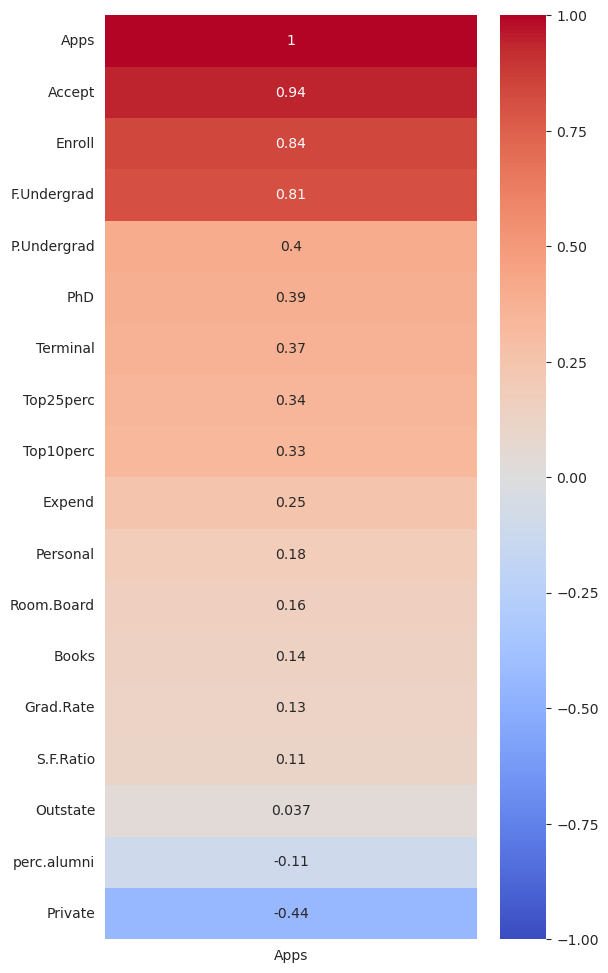

In [56]:
plt.figure(figsize= (6, 12))
sns.heatmap(data.corr(numeric_only= True)[['Apps']].sort_values(by = 'Apps', ascending= False), 
           vmin = -1, 
           vmax = 1, 
           annot = True, 
           cmap = 'coolwarm')

In [71]:
sub = data[['Accept','Enroll','F.Undergrad','Apps']]

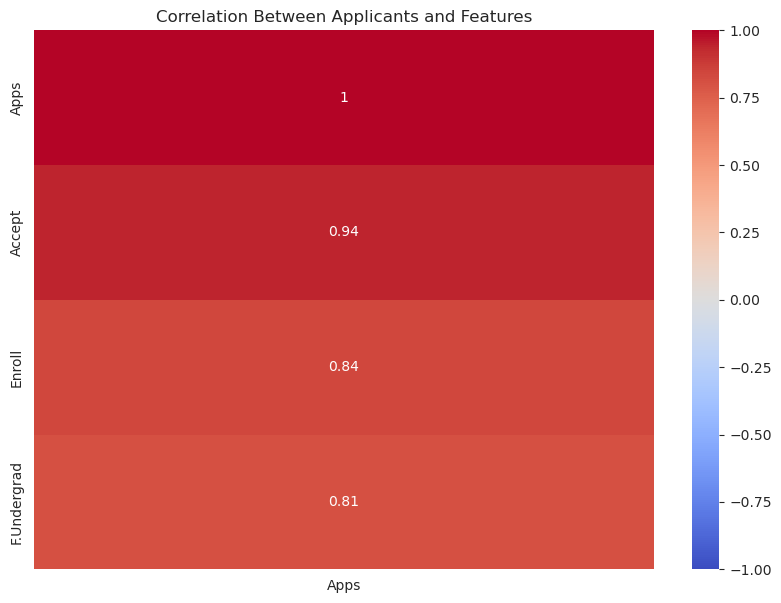

In [84]:
plt.figure(figsize=(10, 7))
sns.heatmap(sub.corr(numeric_only= True)[['Apps']].sort_values(by = 'Apps', ascending= False), 
           vmin = -1, 
           vmax = 1, 
           annot = True, 
           cmap = 'coolwarm')
plt.title('Correlation Between Applicants and Features')
plt.savefig('visuals/heatmap.png')

In [30]:
sns.set_style('darkgrid')

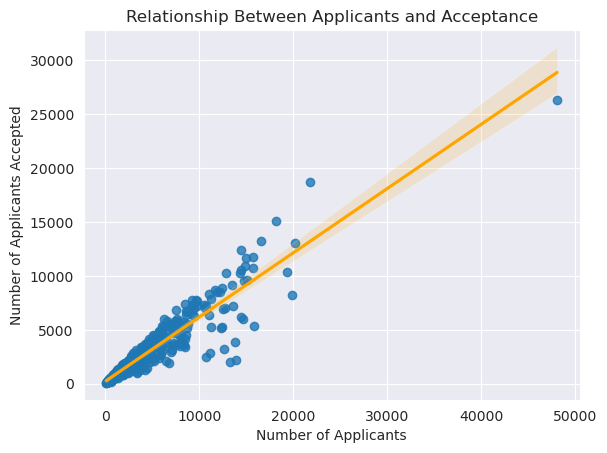

In [82]:
sns.regplot(data,x = 'Apps',y = 'Accept', line_kws= {'color' : 'Orange'})
plt.title('Relationship Between Applicants and Acceptance')
plt.xlabel('Number of Applicants')
plt.ylabel('Number of Applicants Accepted')
plt.savefig('visuals/regplot.png')

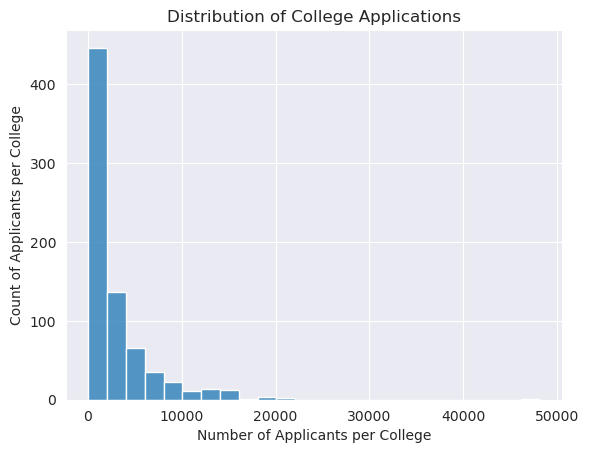

In [83]:
sns.histplot(data, x = 'Apps', binwidth= 2000)
plt.title('Distribution of College Applications')
plt.xlabel('Number of Applicants per College')
plt.ylabel('Count of Applicants per College')
plt.savefig('visuals/histogram.png')

# Step 4: Modeling

# Liner Regression

In [57]:
X = data[['Accept','Enroll','F.Undergrad']]

y = data['Apps']

In [58]:
scores = []

for i in range(10, 31):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = i/100)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    lr.predict(X_test)
    train_score = lr.score(X_train, y_train)
    test_score = lr.score(X_test, y_test)
    scores.append({'i' : i, 'train_score' : train_score, 'test_score' : test_score})
lr_scores = pd.DataFrame(scores)

In [59]:
lr_scores
# Linear Regression got the best R squared scores by far, so I'll use it

,i,train_score,test_score
0,10,0.874200,0.919423
1,11,0.872326,0.918991
2,12,0.873936,0.915121
3,13,0.873023,0.916439
4,14,0.876298,0.905093
5,15,0.883676,0.891360
6,16,0.883693,0.891609
7,17,0.882958,0.892908
8,18,0.883330,0.892112
9,19,0.882972,0.893059


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.10)
    
lr = LinearRegression()

lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [65]:
lr.score(X_test, y_test)

0.9194231314236373

### Pickling

In [66]:
lr_pkl = ''

In [67]:
with open('lr_pkl','wb') as file:
    model = pickle.dump(lr, file)

In [68]:
with open('lr_pkl','rb') as file:
    model = pickle.load(file)

## Random Forest

In [60]:
scores = []

for i in range(10, 31):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = i/100)
    rfr = RandomForestRegressor(random_state= 42)
    rfr.fit(X_train, y_train)
    rfr.predict(X_test)
    train_score = rfr.score(X_train, y_train)
    test_score = rfr.score(X_test, y_test)
    scores.append({'i' : i, 'train_score' : train_score, 'test_score' : test_score})
rfr_scores = pd.DataFrame(scores)

In [61]:
rfr_scores

,i,train_score,test_score
0,10,0.978095,0.663479
1,11,0.973793,0.679806
2,12,0.975946,0.651537
3,13,0.976382,0.666621
4,14,0.978861,0.673172
5,15,0.977432,0.673746
6,16,0.978713,0.673793
7,17,0.979295,0.680287
8,18,0.977575,0.681235
9,19,0.978870,0.676661


## Decission Tree

In [62]:
scores = []

for i in range(10, 31):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = i/100)
    dtr = DecisionTreeRegressor(random_state= 42)
    dtr.fit(X_train, y_train)
    dtr.predict(X_test)
    train_score = dtr.score(X_train, y_train)
    test_score = dtr.score(X_test, y_test)
    scores.append({'i' : i, 'train_score' : train_score, 'test_score' : test_score})
dtr_scores = pd.DataFrame(scores)

In [63]:
dtr_scores

,i,train_score,test_score
0,10,1.0,0.718334
1,11,1.0,0.730510
2,12,1.0,0.664100
3,13,1.0,0.663502
4,14,1.0,0.670367
5,15,1.0,0.665320
6,16,1.0,0.674544
7,17,1.0,0.681623
8,18,1.0,0.705658
9,19,1.0,0.658384
